# Weather Forecasting

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [2]:
df = pd.read_csv('/content/weather forecasting.csv')
df.shape

(98913, 20)

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  98913 non-null  object 
 1    _conds       98845 non-null  object 
 2    _dewptm      98294 non-null  float64
 3    _fog         98913 non-null  int64  
 4    _hail        98913 non-null  int64  
 5    _heatindexm  29111 non-null  float64
 6    _hum         98160 non-null  float64
 7    _precipm     0 non-null      float64
 8    _pressurem   98682 non-null  float64
 9    _rain        98913 non-null  int64  
 10   _snow        98913 non-null  int64  
 11   _tempm       98244 non-null  float64
 12   _thunder     98913 non-null  int64  
 13   _tornado     98913 non-null  int64  
 14   _vism        94497 non-null  float64
 15   _wdird       84533 non-null  float64
 16   _wdire       84533 non-null  object 
 17   _wgustm      1063 non-null   float64
 18   _windchillm  573 non-null

In [5]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,98294.000000,98913.000000,98913.000000,29111.000000,98160.000000,0.0,9.868200e+04,98913.000000,98913.00000,98244.000000,98913.000000,98913.000000,94497.000000,84533.000000,1063.000000,573.000000,96560.000000
mean,15.817130,0.067109,0.000131,35.659606,57.774358,NaN,1.951861e+03,0.026498,0.00001,25.578427,0.009362,0.000020,2.419885,162.550980,37.704516,5.708202,7.685854
std,7.096917,0.250213,0.011464,5.013579,23.754463,NaN,3.217101e+05,0.160612,0.00318,8.464732,0.096303,0.004497,20.970678,120.019889,6.841070,1.205967,11.995965
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.00000,19.000000,0.000000,0.000000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,58.000000,NaN,1.008000e+03,0.000000,0.00000,27.000000,0.000000,0.000000,2.000000,150.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,77.000000,NaN,1.014000e+03,0.000000,0.00000,32.000000,0.000000,0.000000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.00000,90.000000,1.000000,1.000000,6436.000000,960.000000,92.600000,7.300000,1514.900000


## Initial Data Inspection and Cleaning



In [7]:
df.columns = df.columns.str.strip()

print("Missing values before dropping columns:")
print(df.isnull().sum())

# Drop columns with a very high percentage of missing values
df = df.drop(columns=['_precipm', '_heatindexm', '_wgustm', '_windchillm'])
print("\nMissing values after dropping specified columns:")
print(df.isnull().sum())

# Convert 'datetime_utc' to datetime objects
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

# Replace -9999 in '_pressurem' with NaN
df['_pressurem'] = df['_pressurem'].replace(-9999, np.nan)

print("\nDataFrame info after cleaning steps:")
df.info()

Missing values before dropping columns:
datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_heatindexm     69802
_hum              753
_precipm        98913
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wgustm         97850
_windchillm     98340
_wspdm           2353
dtype: int64

Missing values after dropping specified columns:
datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_hum              753
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wspdm           2353
dtype: int64

DataFrame info after cleaning steps:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9891

## Feature Engineering



In [8]:
df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df['day'] = df['datetime_utc'].dt.day
df['hour'] = df['datetime_utc'].dt.hour

# One-hot encode '_conds' and '_wdire'
df = pd.get_dummies(df, columns=['_conds', '_wdire'], drop_first=True, dtype=int)

print("DataFrame after feature engineering:")
df.head()
df.info()

DataFrame after feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 72 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   datetime_utc                          98913 non-null  datetime64[ns]
 1   _dewptm                               98294 non-null  float64       
 2   _fog                                  98913 non-null  int64         
 3   _hail                                 98913 non-null  int64         
 4   _hum                                  98160 non-null  float64       
 5   _pressurem                            97933 non-null  float64       
 6   _rain                                 98913 non-null  int64         
 7   _snow                                 98913 non-null  int64         
 8   _tempm                                98244 non-null  float64       
 9   _thunder                           

In [9]:
df = df.drop(columns=['datetime_utc'])
print("DataFrame after dropping datetime_utc column:")
df.info()


DataFrame after dropping datetime_utc column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 71 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   _dewptm                               98294 non-null  float64
 1   _fog                                  98913 non-null  int64  
 2   _hail                                 98913 non-null  int64  
 3   _hum                                  98160 non-null  float64
 4   _pressurem                            97933 non-null  float64
 5   _rain                                 98913 non-null  int64  
 6   _snow                                 98913 non-null  int64  
 7   _tempm                                98244 non-null  float64
 8   _thunder                              98913 non-null  int64  
 9   _tornado                              98913 non-null  int64  
 10  _vism                               

## Missing Value Imputation




In [10]:
numerical_cols_with_missing = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
print("Numerical columns with missing values before imputation:", numerical_cols_with_missing)


Numerical columns with missing values before imputation: ['_dewptm', '_hum', '_pressurem', '_tempm', '_vism', '_wdird', '_wspdm']


In [11]:
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after median imputation:")
print(df.isnull().sum())

Missing values after median imputation:
_dewptm            0
_fog               0
_hail              0
_hum               0
_pressurem         0
                  ..
_wdire_South       0
_wdire_Variable    0
_wdire_WNW         0
_wdire_WSW         0
_wdire_West        0
Length: 71, dtype: int64


/tmp/ipython-input-50368222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [12]:
for col in numerical_cols_with_missing:
    df[col] = df[col].fillna(df[col].median())

print("Missing values after median imputation:")
print(df.isnull().sum())

Missing values after median imputation:
_dewptm            0
_fog               0
_hail              0
_hum               0
_pressurem         0
                  ..
_wdire_South       0
_wdire_Variable    0
_wdire_WNW         0
_wdire_WSW         0
_wdire_West        0
Length: 71, dtype: int64


## Data Splitting




In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/weather forecasting.csv')

df.columns = df.columns.str.strip()
df = df.drop(columns=['_precipm', '_heatindexm', '_wgustm', '_windchillm'])
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df['_pressurem'] = df['_pressurem'].replace(-9999, np.nan)

df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df['day'] = df['datetime_utc'].dt.day
df['hour'] = df['datetime_utc'].dt.hour
df = pd.get_dummies(df, columns=['_conds', '_wdire'], drop_first=True, dtype=int)
df = df.drop(columns=['datetime_utc'])

numerical_cols_with_missing = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

X = df.drop(columns=['_tempm'])
y = df['_tempm']

split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (79130, 70)
X_test shape: (19783, 70)
y_train shape: (79130,)
y_test shape: (19783,)


/tmp/ipython-input-2200807784.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding one-hot encoded and target, if applicable)
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert scaled arrays back to DataFrames, preserving column names and index
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# For features that were not numerical (e.g., one-hot encoded), they do not need scaling.
# We will concatenate them back to the scaled numerical features.
non_numerical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
if non_numerical_cols:
    X_train_final = pd.concat([X_train_scaled, X_train[non_numerical_cols]], axis=1)
    X_test_final = pd.concat([X_test_scaled, X_test[non_numerical_cols]], axis=1)
else:
    X_train_final = X_train_scaled
    X_test_final = X_test_scaled

print("Features scaled successfully.")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

Features scaled successfully.
X_train_final shape: (79130, 70)
X_test_final shape: (19783, 70)


## Model Training




In [5]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model to the training data
rf_model.fit(X_train_final, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Model Evaluation and Visualization




RandomForestRegressor model trained successfully.

Mean Absolute Error (MAE): 0.79
Mean Squared Error (MSE): 1.84
R-squared (R2) Score: 0.97


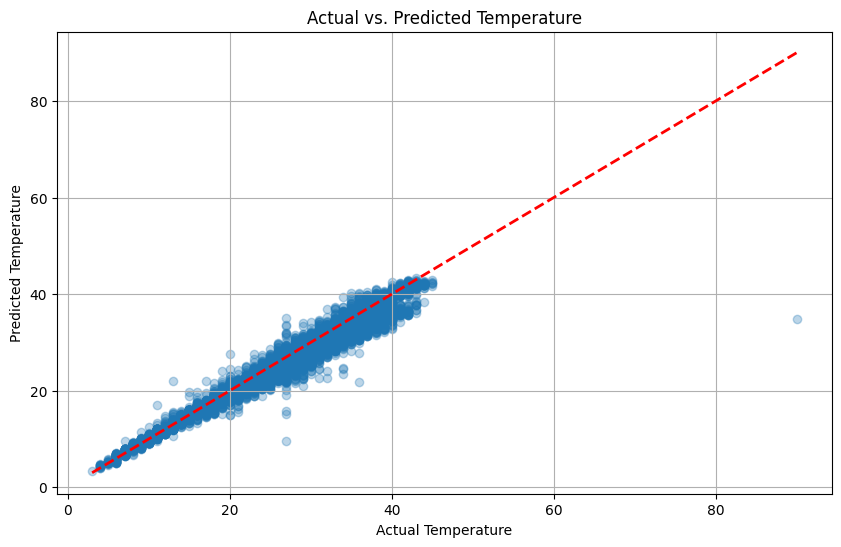

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model to the training data
rf_model.fit(X_train_final, y_train)

print("RandomForestRegressor model trained successfully.")

# Make predictions on the test set
y_pred = rf_model.predict(X_test_final)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect predictions
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs. Predicted Temperature")
plt.grid(True)
plt.show()